# Import necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Load the dataset

In [2]:
df = pd.read_csv("../data/raw/loan_default_dataset_v2.csv")

In [3]:
X = df.drop(columns=["default"])
y = df["default"]

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Logistic Regression

In [5]:
model = LogisticRegression(max_iter=1, warm_start=True, solver="lbfgs")
losses = []

for i in range(50):
    model.fit(X_scaled, y)
    probs = model.predict_proba(X_scaled)[:, 1]
    loss = -np.mean(
        y * np.log(probs + 1e-9) + (1 - y) * np.log(1 - probs + 1e-9)
    )
    losses.append(loss)


c:\Users\rishi\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\rishi\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1).
You might also want to scale the data as shown in:
    https://scikit-learn.

# Plot Loss Curve

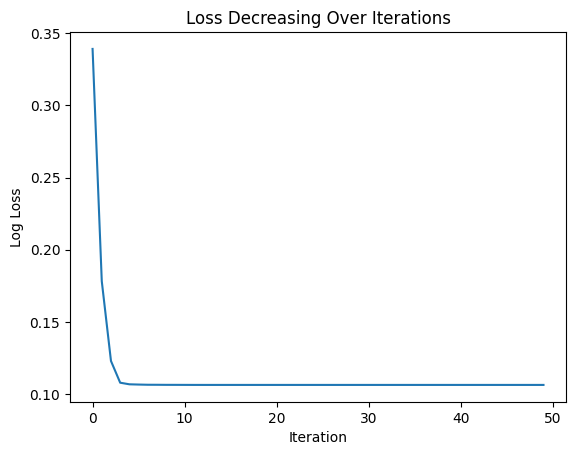

In [6]:
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Log Loss")
plt.title("Loss Decreasing Over Iterations")
plt.show()